In [76]:
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb
import datetime as dt
import numpy as np

In [77]:
# 폰트 설정
#plt.rcParams['font.family'] = "Malgun Gothic" # 윈도우 전용
plt.rcParams['font.family'] = "Malgun Gothic"
#글자 크기
plt.rcParams["font.size"] = 12
# 그래프 크기설정(inch)
plt.rcParams["figure.figsize"] = (15, 7)
# 유티코드에서 음수 부호 설정
plt.rcParams['axes.unicode_minus'] = False

In [78]:
df = read_excel("https://data.hossam.kr/D02/kings_life.xlsx")
df

,왕,수명
0,태조,73
1,정종,62
2,태종,45
3,세종,53
4,문종,38
5,단종,16
6,세조,51
7,예종,28
8,성종,37
9,연산,30


In [79]:
df.shape

(27, 2)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   왕       27 non-null     object
 1   수명      27 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 564.0+ bytes


In [81]:
df.duplicated().sum()

0

In [82]:
df.isnull().sum()

왕     0
수명    0
dtype: int64

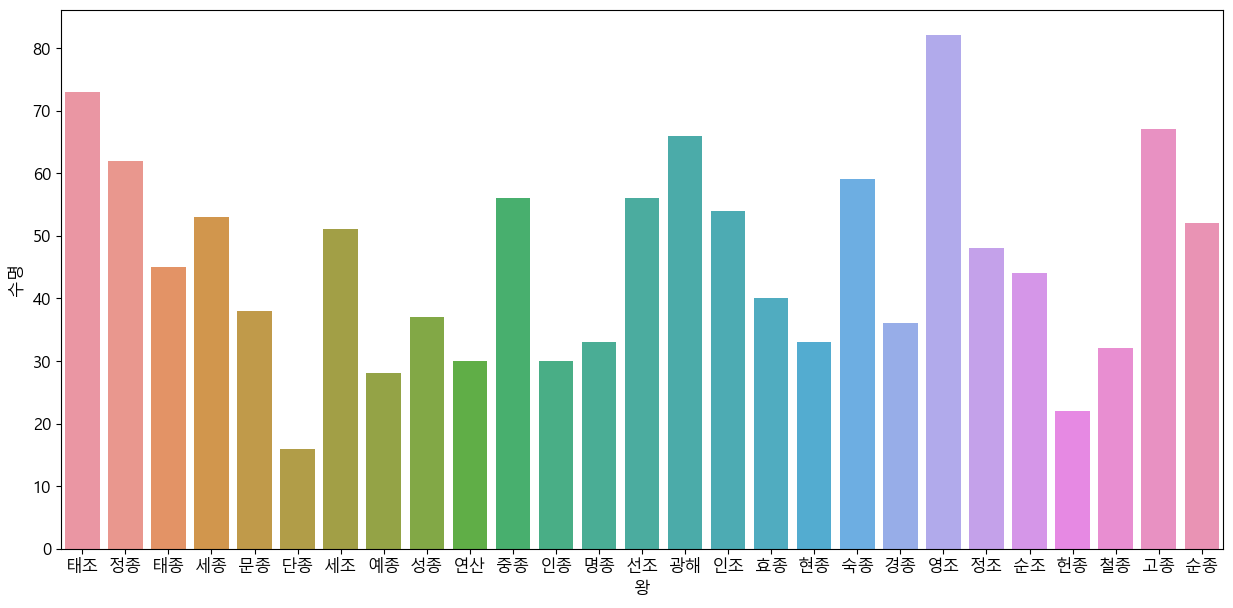

In [83]:
sb.barplot(data=df, x='왕', y='수명')
plt.show()
plt.close()

In [84]:
life_mean = df['수명'].mean()
# print(life_mean)

In [85]:
df['life'] = np.where(df['수명']>df['수명'].mean(),# 중앙값 계산,
                             1, # True일 경우
                             0 # False 일경우)
                            )
df['life']

0     1
1     1
2     0
3     1
4     0
5     0
6     1
7     0
8     0
9     0
10    1
11    0
12    0
13    1
14    1
15    1
16    0
17    0
18    1
19    0
20    1
21    1
22    0
23    0
24    0
25    1
26    1
Name: life, dtype: int32

역대 왕들의 평균 수명을 봤을 때 그보다 오래 사신 분들을 시각화하면 다음과 같다.

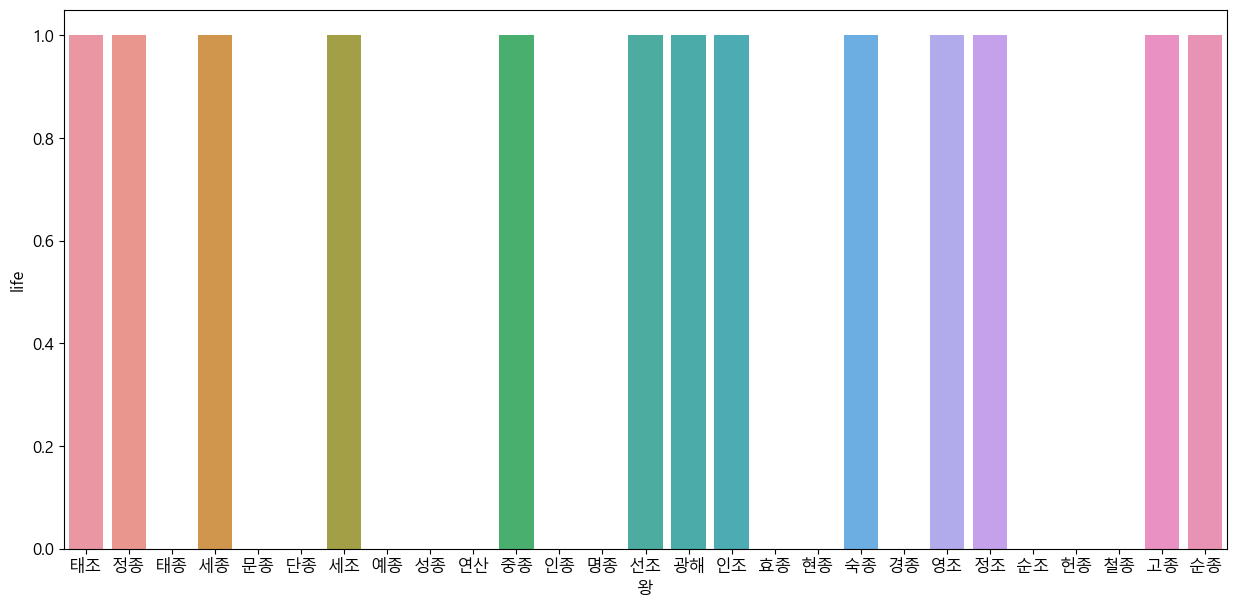

In [86]:
sb.barplot(data=df, x='왕', y='life')
plt.show()
plt.close()

In [87]:
df = read_excel("https://data.hossam.kr/D02/stock.xlsx")
df

,구분,주가
0,F,120
1,K,165
2,K,147
3,F,144
4,K,135
5,K,161
6,K,102
7,K,165
8,K,170
9,F,147


In [88]:
df.shape

(24, 2)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      24 non-null     object
 1   주가      24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 516.0+ bytes


In [90]:
df.duplicated().sum()

6

In [91]:
df = df.drop_duplicates()

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      18 non-null     object
 1   주가      18 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 432.0+ bytes


In [93]:
df.isnull().sum()

구분    0
주가    0
dtype: int64

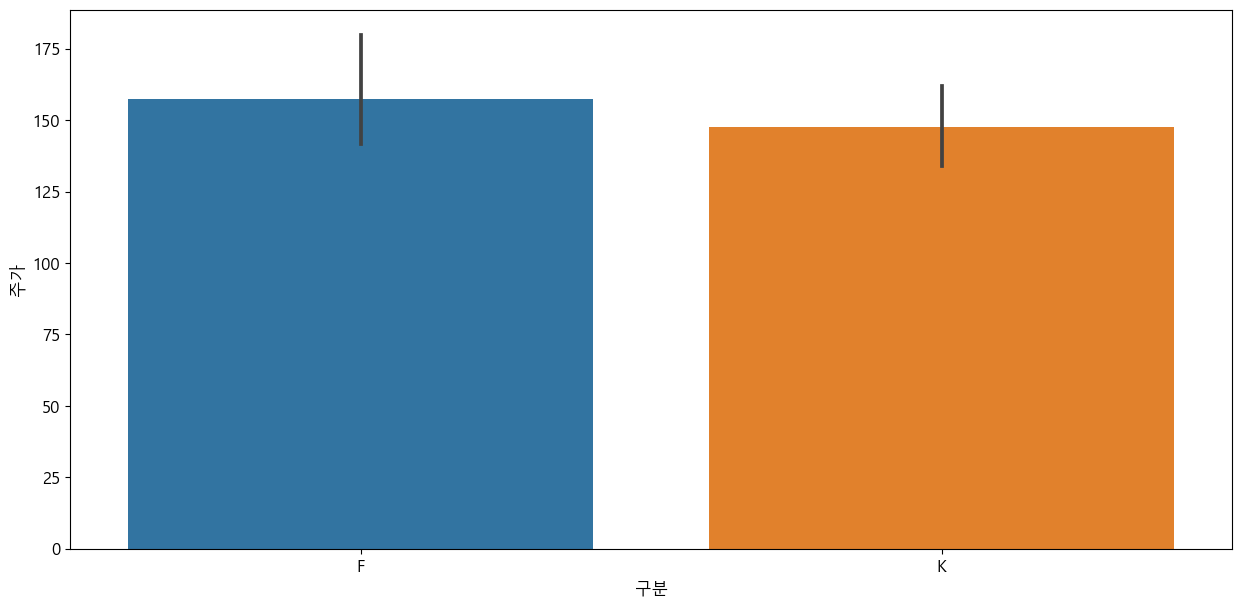

In [94]:
sb.barplot(data=df, x='구분', y='주가')
plt.show()
plt.close()

<Axes: xlabel='구분', ylabel='count'>

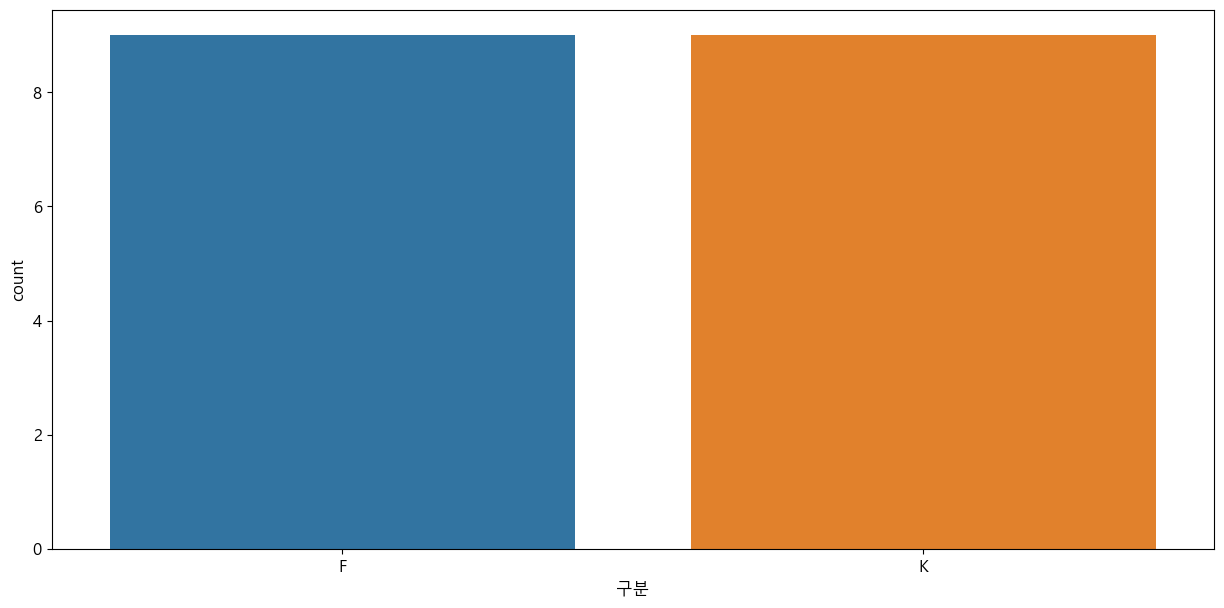

In [95]:
sb.countplot(data=df, x="구분")

In [96]:
df.describe()
df_mean = 152.3

In [97]:
df['price'] = np.where(df['주가']>df['주가'].mean(),# 중앙값 계산,
                             'higt', # True일 경우
                             'low' # False 일경우)
                            )
df['price']

C:\Users\user\AppData\Local\Temp\ipykernel_8848\4064994703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = np.where(df['주가']>df['주가'].mean(),# 중앙값 계산,


0      low
1     higt
2      low
3      low
4      low
5     higt
6      low
8     higt
9      low
10    higt
11    higt
12     low
13     low
14    higt
15    higt
20    higt
21     low
22     low
Name: price, dtype: object

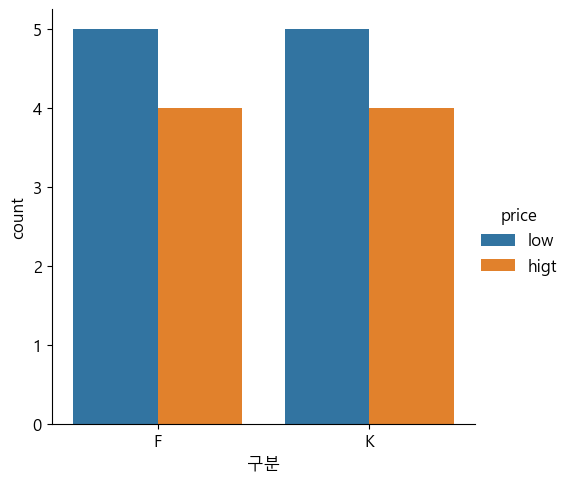

In [98]:
sb.catplot(data=df,
            x='구분',     # 집단을 구분하는 기준
            kind='count',    # 빈도 막대그래프 그리기
            hue='price' 
        )
plt.show()

In [99]:
df = read_excel("https://data.hossam.kr/D02/grape.xlsx")
df

,비료종류,수확량
0,A,39.3
1,B,11.4
2,A,26.6
3,A,23.7
4,B,25.8
5,A,28.5
6,A,24.2
7,A,17.9
8,B,16.5
9,B,21.1


In [100]:
df.describe()

,수확량
count,11.000000
mean,23.572727
std,7.233131
min,11.400000
25%,19.500000
50%,24.200000
75%,26.200000
max,39.300000


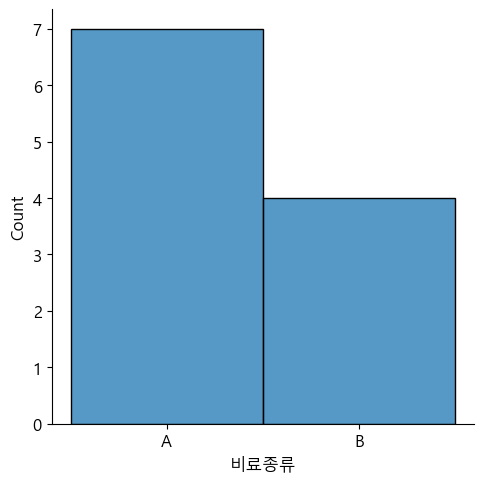

In [101]:
sb.displot(x='비료종류', kind='hist', data=df)
plt.show()

In [102]:
df = read_excel("https://data.hossam.kr/D02/analysis_grade.xlsx")
df

,학과,점수
0,C,54
1,A,52
2,A,37
3,C,41
4,A,67
5,C,43
6,A,73
7,C,51
8,C,55
9,A,15


In [103]:
df.duplicated().sum()

3

In [104]:
df = df.drop_duplicates()

In [105]:
df.duplicated().sum()

0

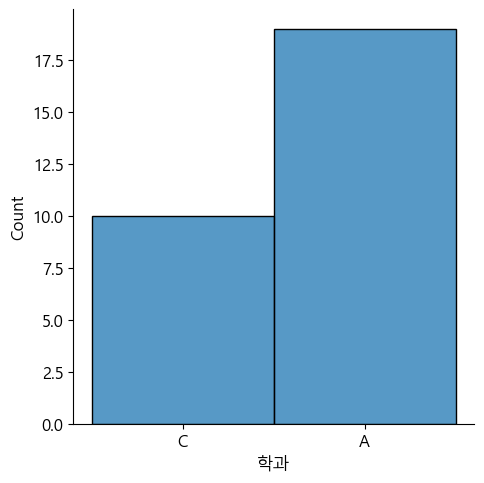

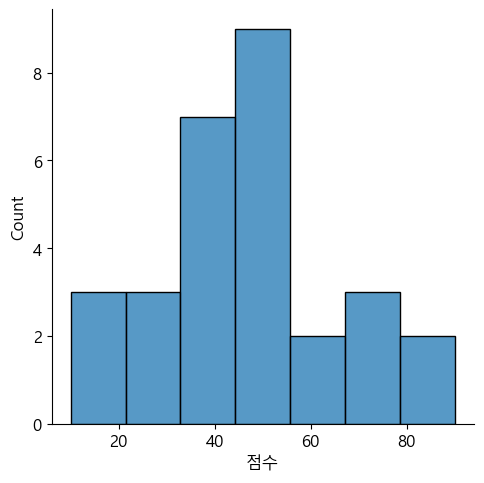

In [107]:
sb.displot(x='학과', kind='hist', data=df)
plt.show()
sb.displot(x='점수', kind='hist', data=df)
plt.show()

In [108]:
df.describe()

,점수
count,29.000000
mean,48.000000
std,20.044593
min,10.000000
25%,37.000000
50%,48.000000
75%,55.000000
max,90.000000


In [109]:
조건 = [
    (df['점수'] >= 90),
    (df['점수'] >= 80),
    (df['점수'] >= 70)
]

값 = ['A', 'B', 'C']

df['등급'] = np.select(조건, 값, default='D')
df

C:\Users\user\AppData\Local\Temp\ipykernel_8848\2133270560.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['등급'] = np.select(조건, 값, default='D')


,학과,점수,등급
0,C,54,D
1,A,52,D
2,A,37,D
3,C,41,D
4,A,67,D
5,C,43,D
6,A,73,C
7,C,51,D
8,C,55,D
9,A,15,D


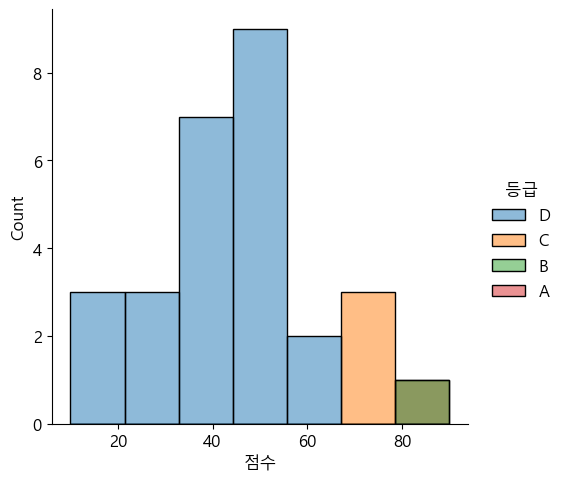

In [116]:
sb.displot(x='점수', hue='등급', kind='hist', data=df)

plt.show()
# 대부분의 학생 성적이 D이상을 못 벗어났다는 것을 알 수있고 30~70점대 학생들이 가장많이 분포해있다.